In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('data/stud.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
df.shape

(1000, 8)

In [5]:
#null values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
#duplicates
df.duplicated().sum()

0

there are no duplicates

In [7]:
#data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### checking the no of uniue values

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### checking statistics of Dataset

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### insights


In [10]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [11]:
print("categories in'gender' variable :       ",end=" ")
print(df['gender'].unique())
print(" categories in 'race_ethnicity' variable:      ",end=" ")
print(df['race_ethnicity'].unique())
print("categories in 'parental_level_of_education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())
print("categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())
print("categories in 'test_preparation_course' variable:   ",end=" ")
print(df['test_preparation_course'].unique())


categories in'gender' variable :        ['female' 'male']
 categories in 'race_ethnicity' variable:       ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:    ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:    ['none' 'completed']


In [12]:
numeric_features=[features for features in df.columns if df[features].dtype !='O']
categorical_features=[features for features in df.columns if df[features].dtype =='O']

print("we have {} numerical features: {}".format(len(numeric_features),numeric_features))
print("we have {} categorical features: {}".format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']



### ADDING columns for total score and averaage

In [13]:
df['total_score']=df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score']=df['total_score']/3

In [14]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [15]:
reading_full=df[df['reading_score']==100]['average_score'].count()
math_full=df[df['math_score']==100]['average_score'].count()
writing_full=df[df['writing_score']==100]['average_score'].count()

print(f"students scored full marks in reading : {reading_full} ")
print(f"students scored full marks in math : {math_full}")
print(f"students scored full marks in writing: {writing_full}")

students scored full marks in reading : 17 
students scored full marks in math : 7
students scored full marks in writing: 14


In [16]:
reading_score_less_than_20=df[df['reading_score'] <= 20]['average_score'].count()
math_score_less_than_20=df[df['math_score'] <= 20]['average_score'].count()
writing_score_less_than_20=df[df['writing_score'] <= 20]['average_score'].count()

print(f"students scored less than 20 in reading : {reading_score_less_than_20}")
print(f"students scored less than 20 in math: {math_score_less_than_20}")
print(f"students scored less than 20 in writing: {writing_score_less_than_20}")

students scored less than 20 in reading : 1
students scored less than 20 in math: 4
students scored less than 20 in writing: 3


### insights

### visualisation

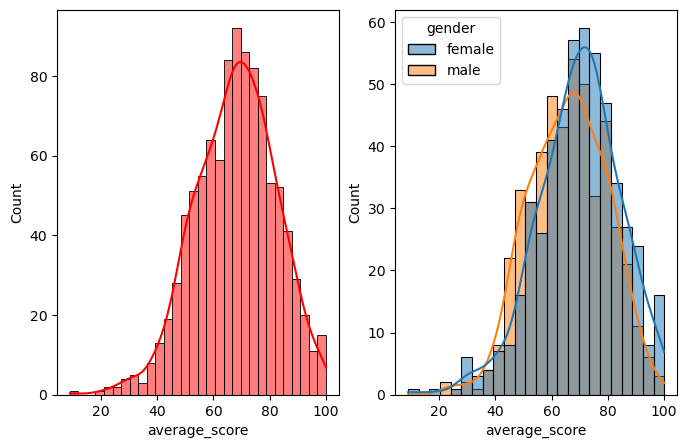

In [17]:
fig, axs=plt.subplots(1, 2, figsize=(8,5))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='r')
plt.subplot(122) 
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

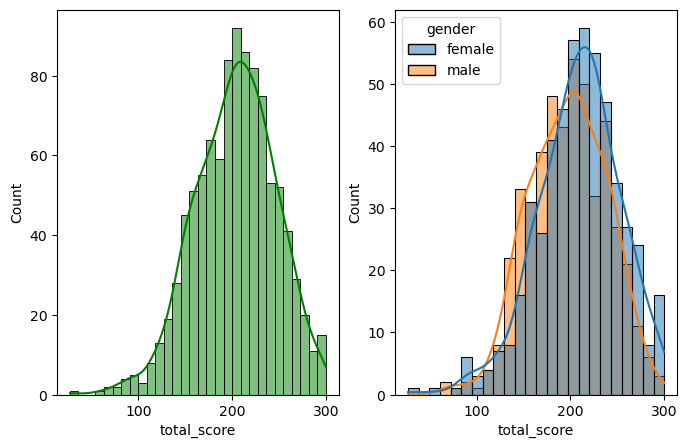

In [18]:
fig, axs=plt.subplots(1, 2, figsize=(8,5))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122) 
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

### insights 

female students tends to perform well than male students

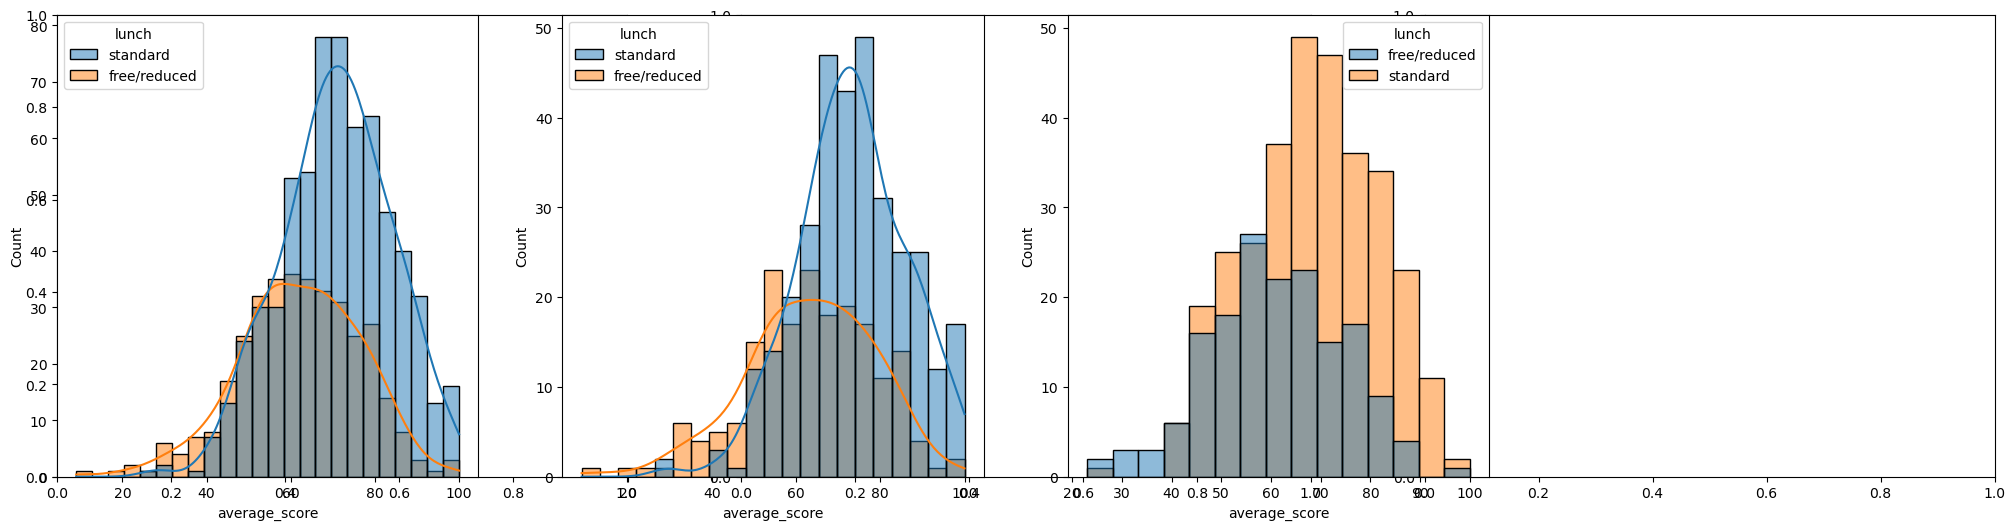

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',hue='lunch')

plt.show()

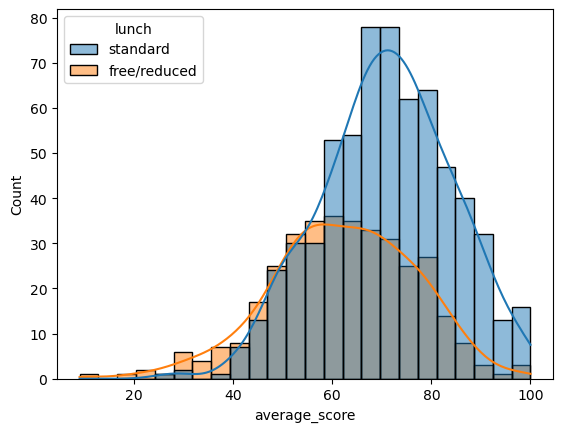

In [20]:
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.show()

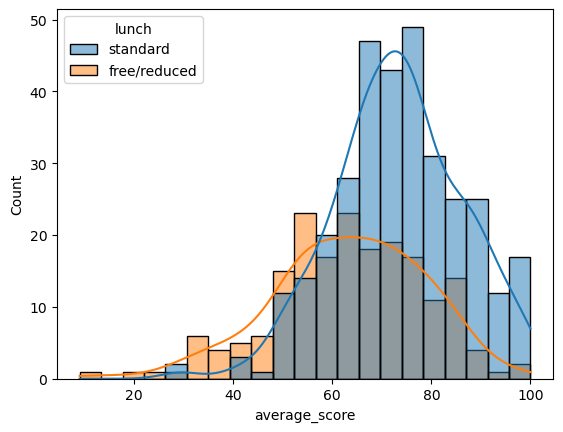

In [21]:
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue="lunch")
plt.show()

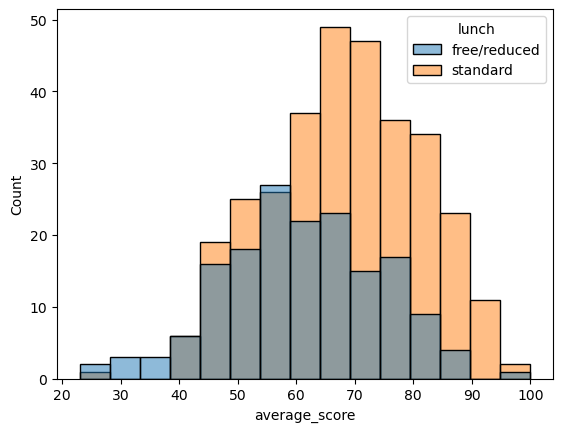

In [22]:
sns.histplot(data=df[df.gender=='male'],x='average_score',hue='lunch')
plt.show()

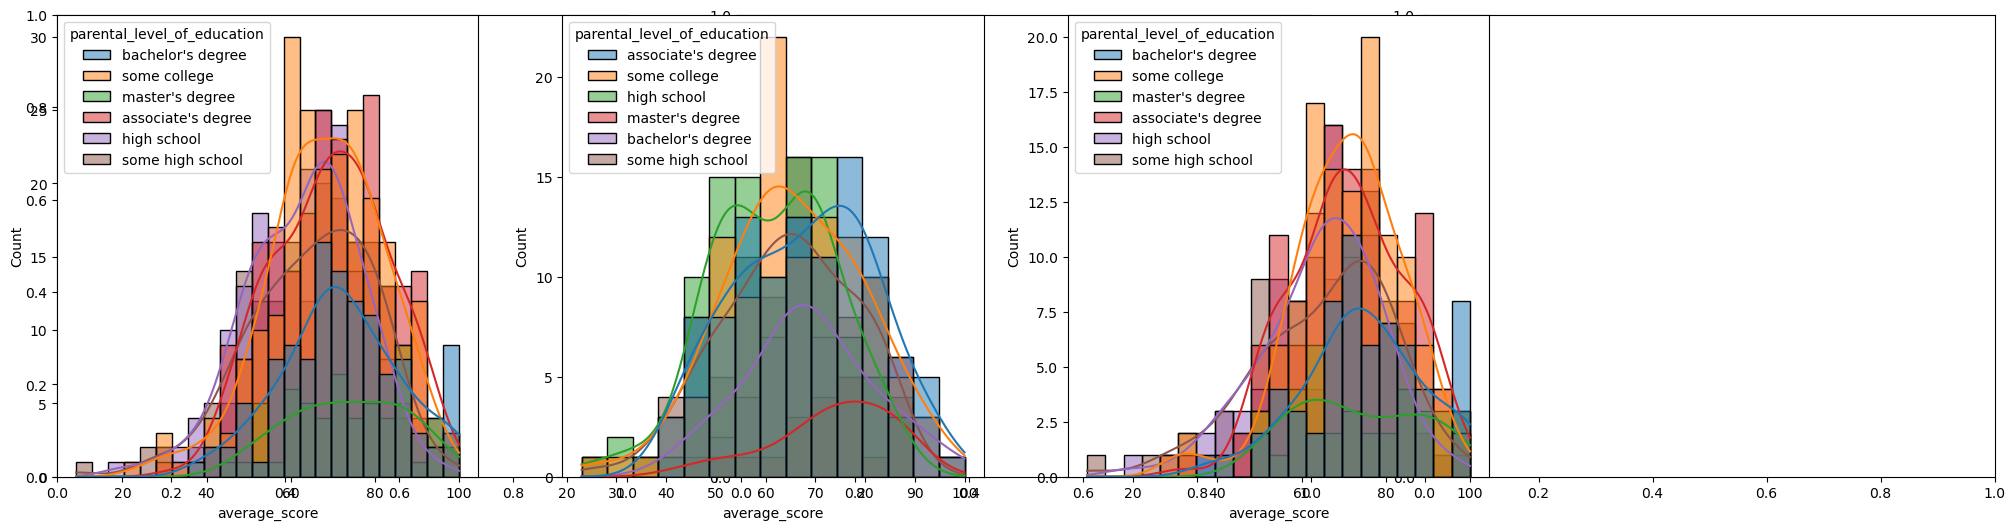

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

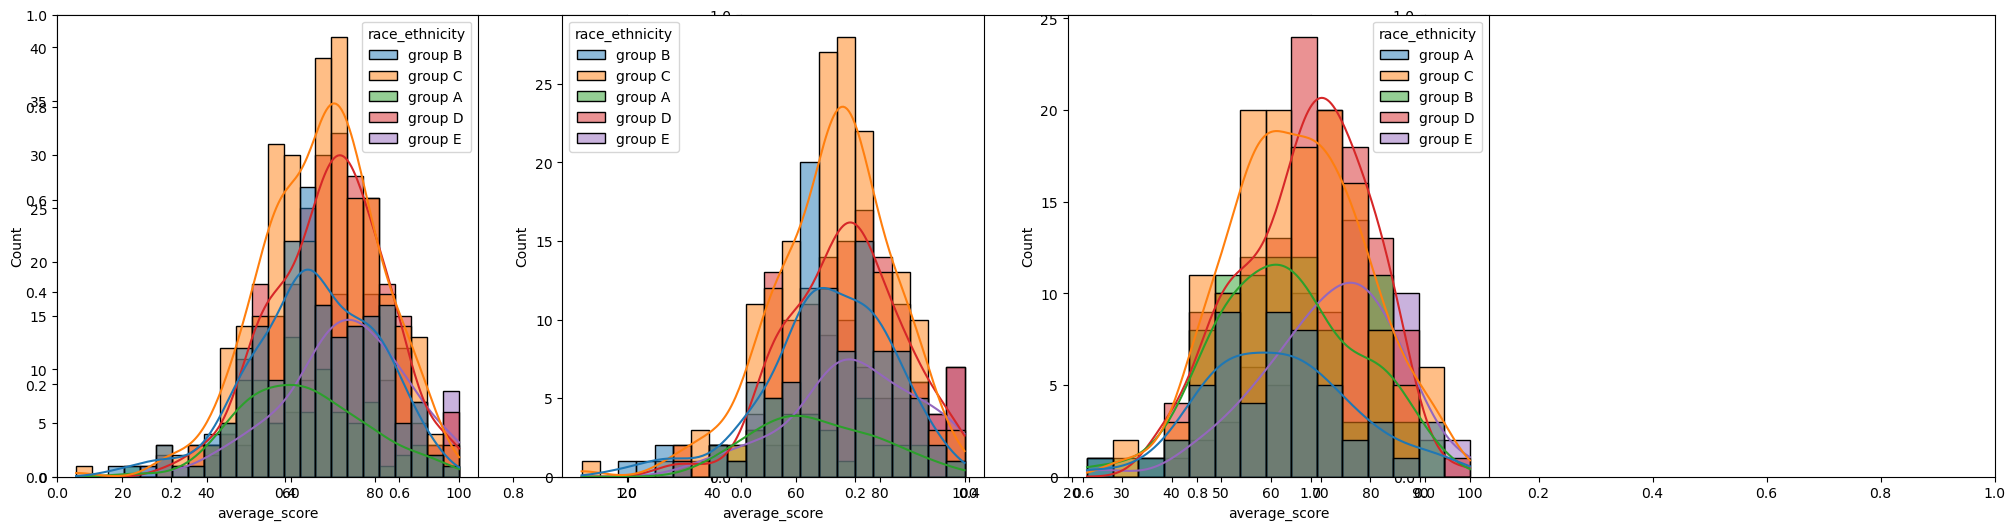

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

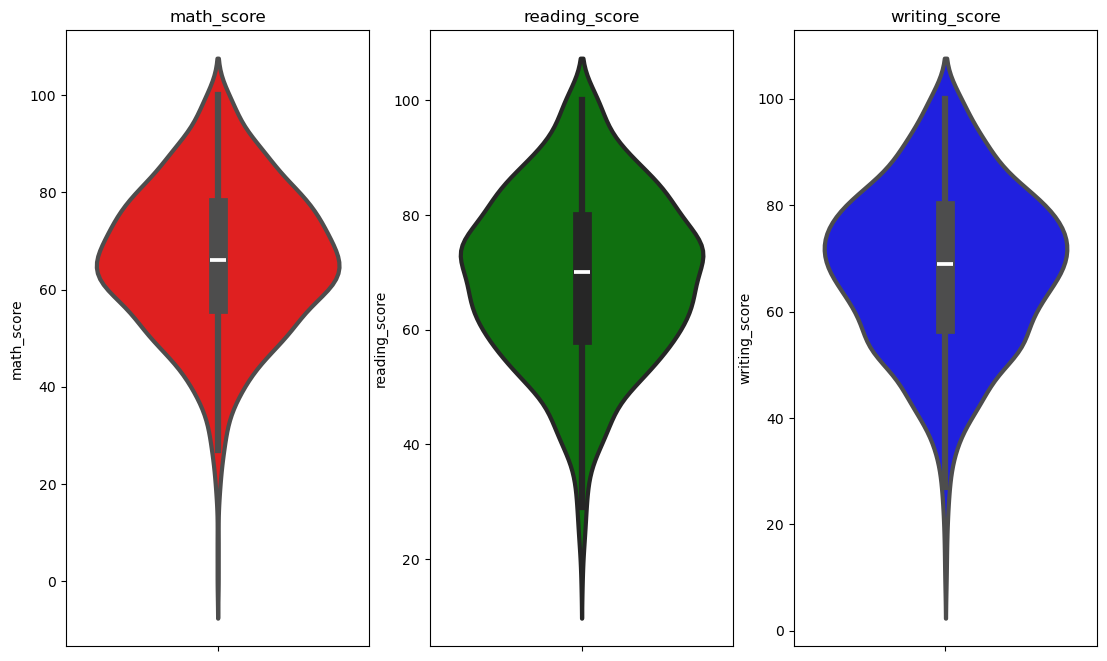

In [38]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('math_score')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('reading_score')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('writing_score')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

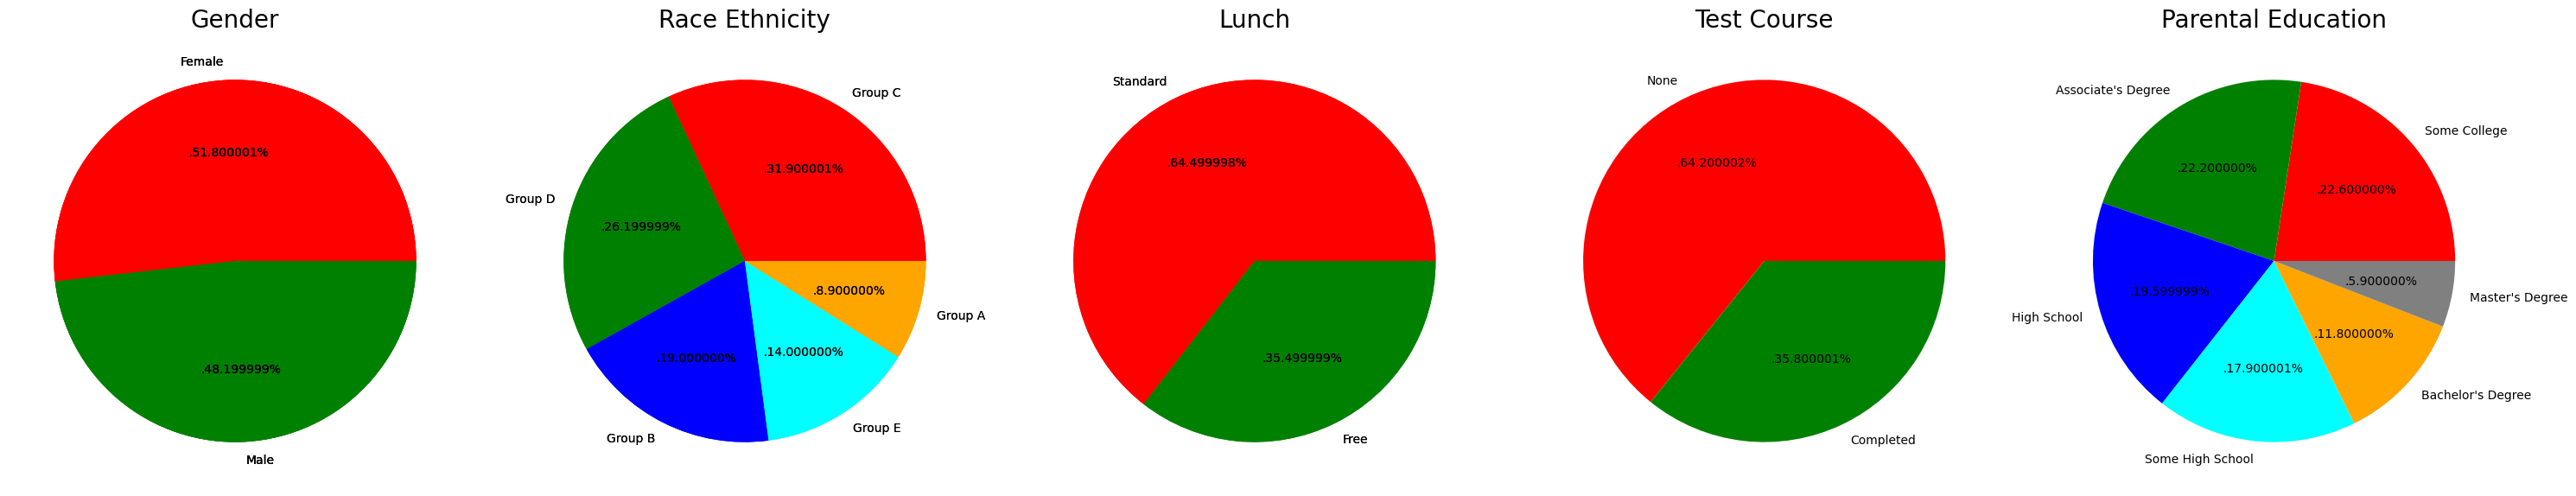

In [41]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

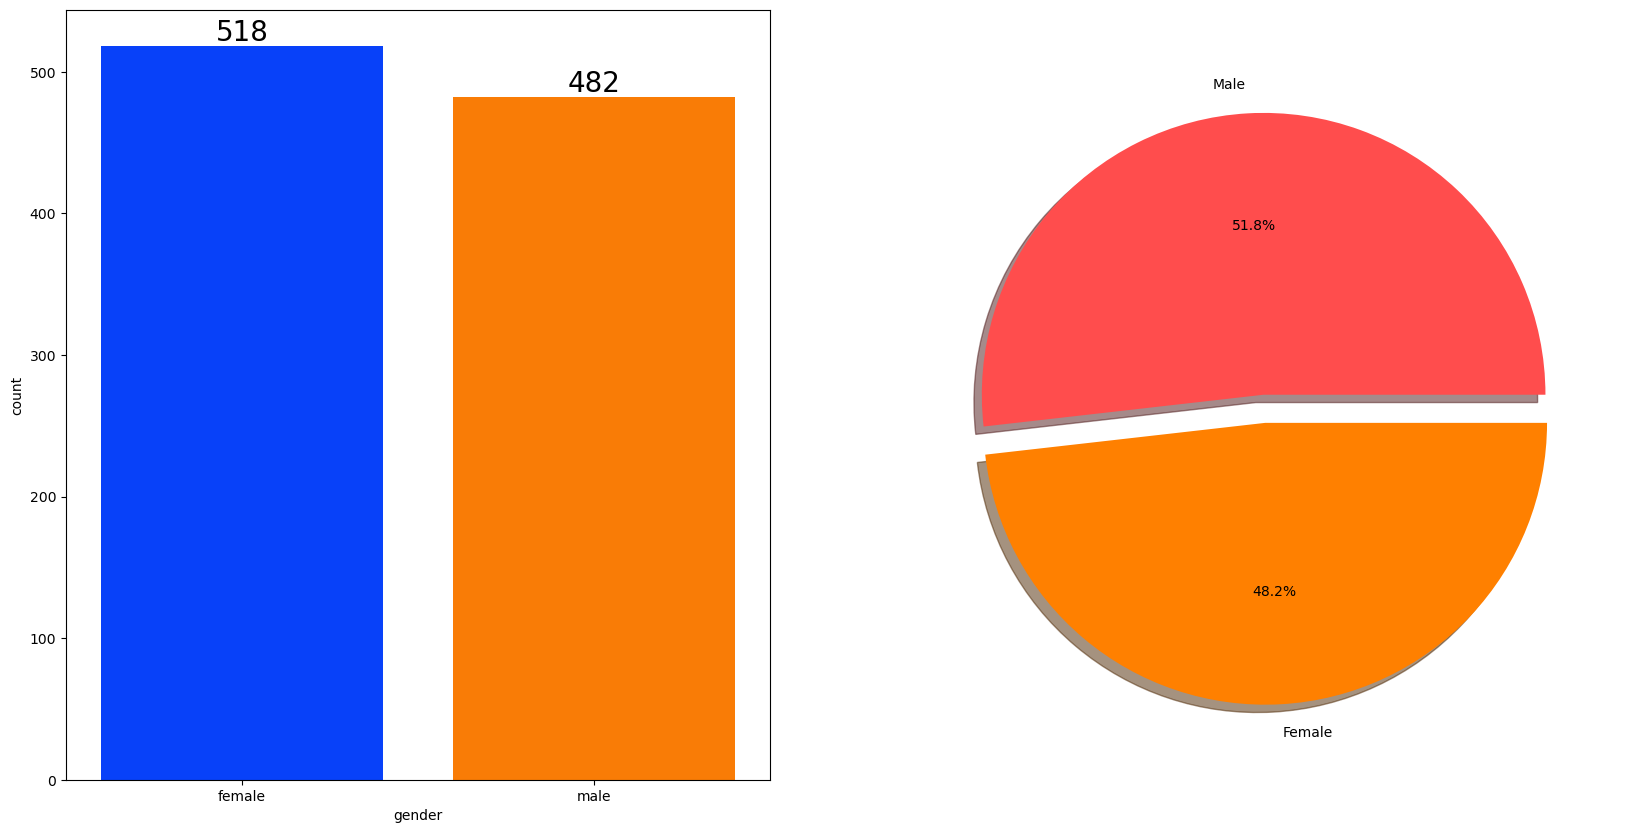

In [42]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [47]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

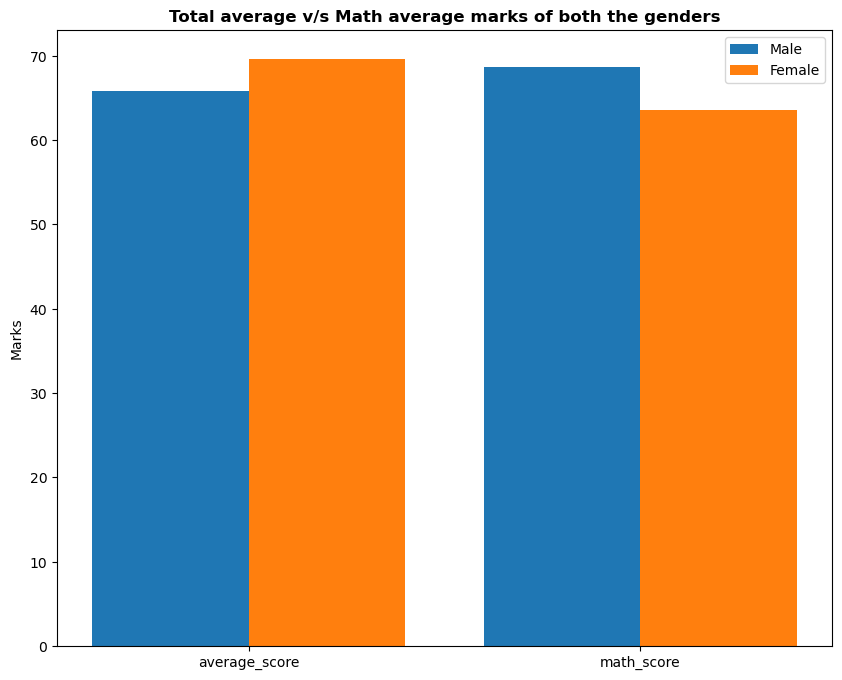

In [53]:
plt.figure(figsize=(10, 8))

X = ['average_score','math_score']


female_scores = [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

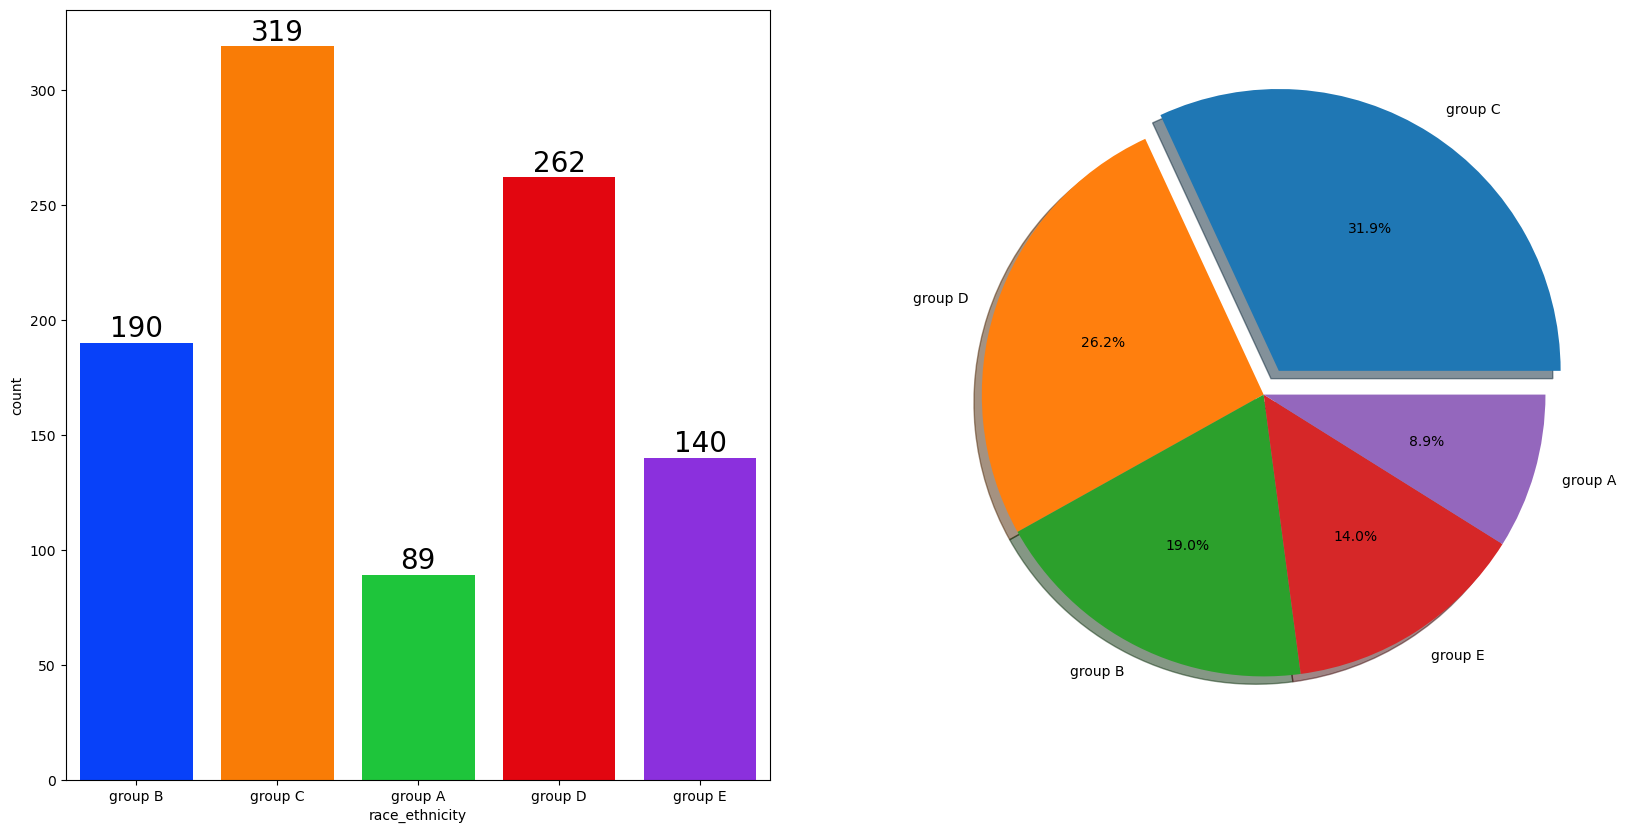

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

####   BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


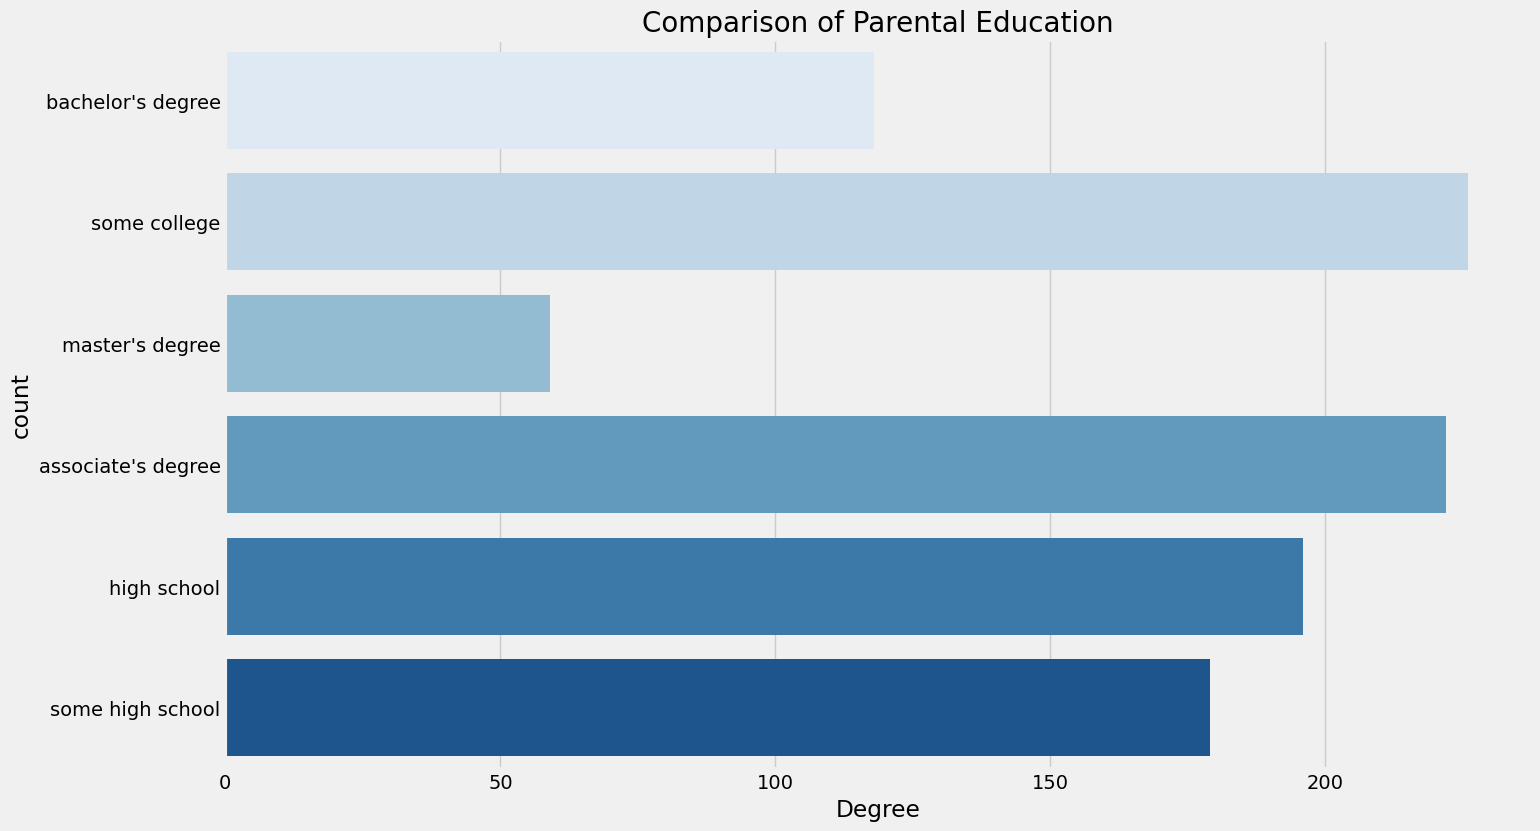

In [60]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

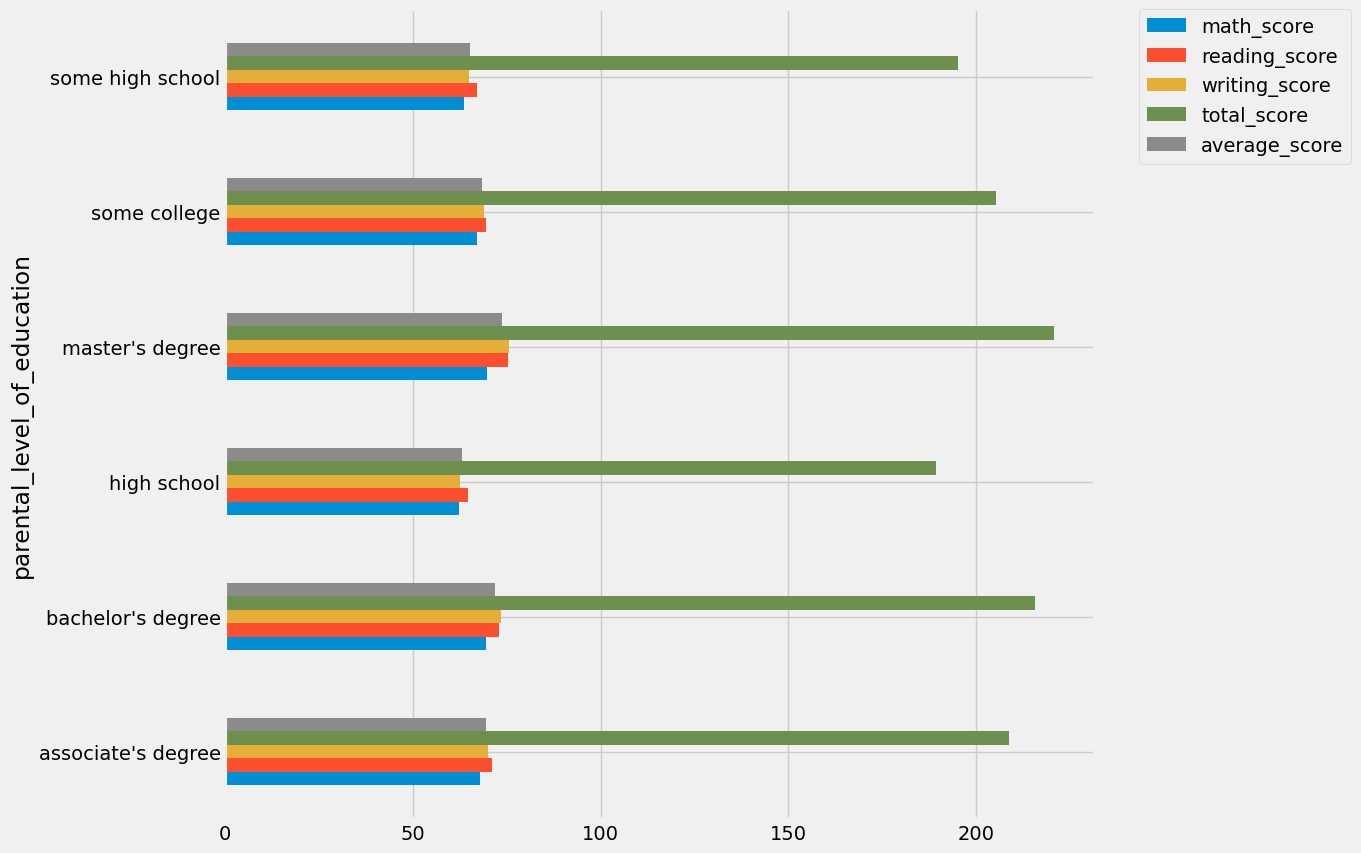

In [63]:
df.groupby('parental_level_of_education').agg('mean',numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?

#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

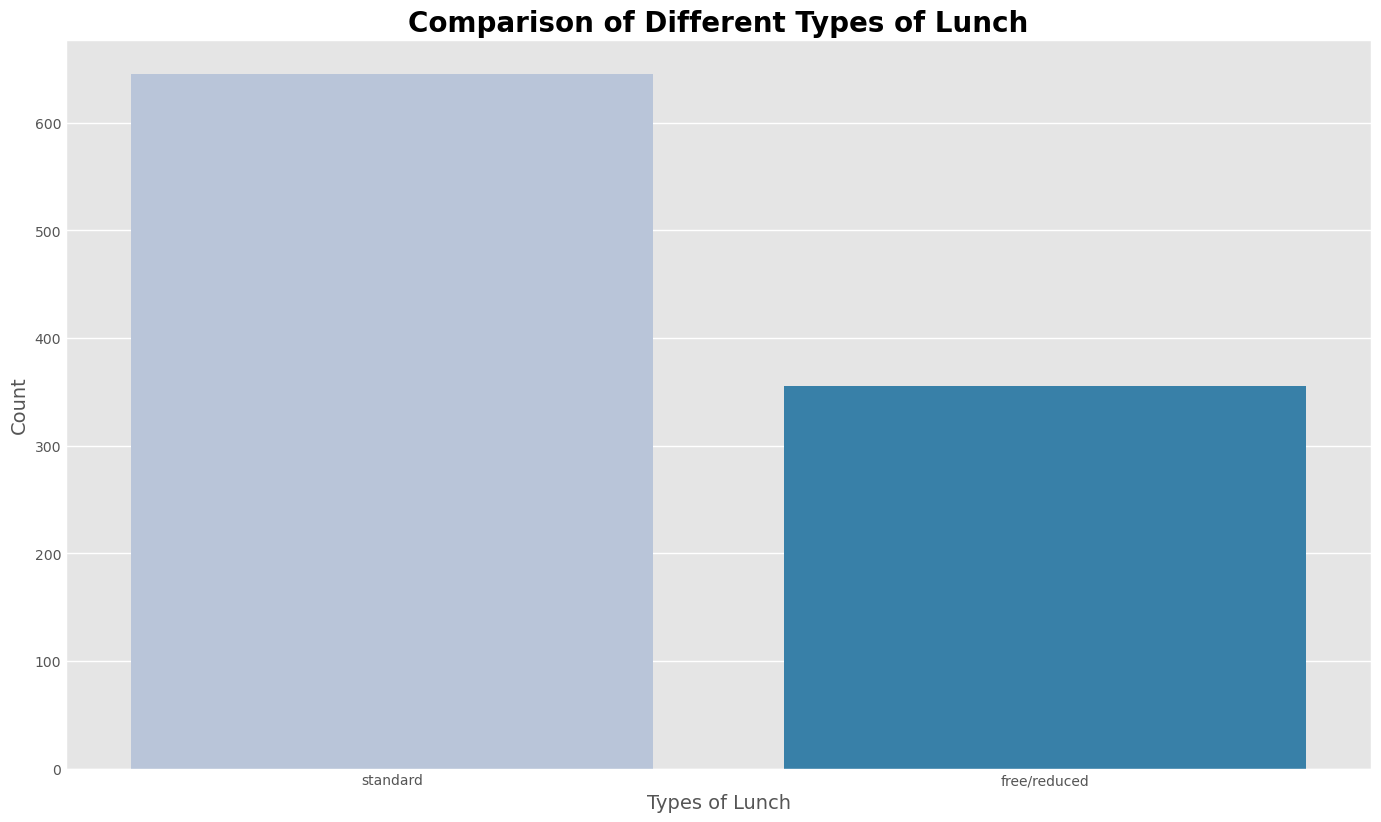

In [72]:
# Set the figure size and style
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot') 

# Plotting the countplot
sns.countplot(x='lunch', data=df, palette='PuBu')

# Title and labels
plt.title('Comparison of Different Types of Lunch', fontweight='bold', fontsize=20)
plt.xlabel('Types of Lunch', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.show()


#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

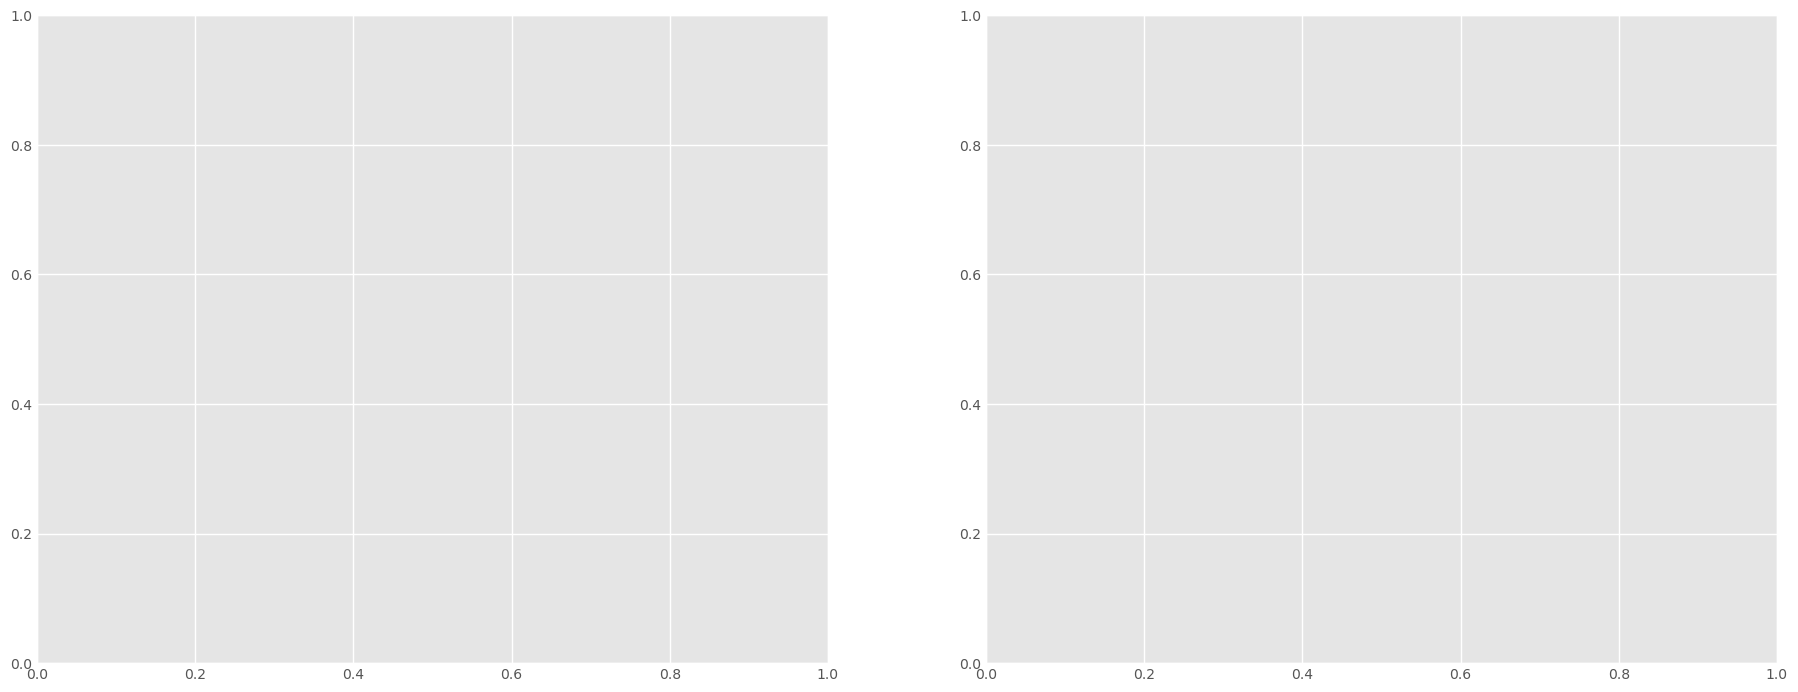

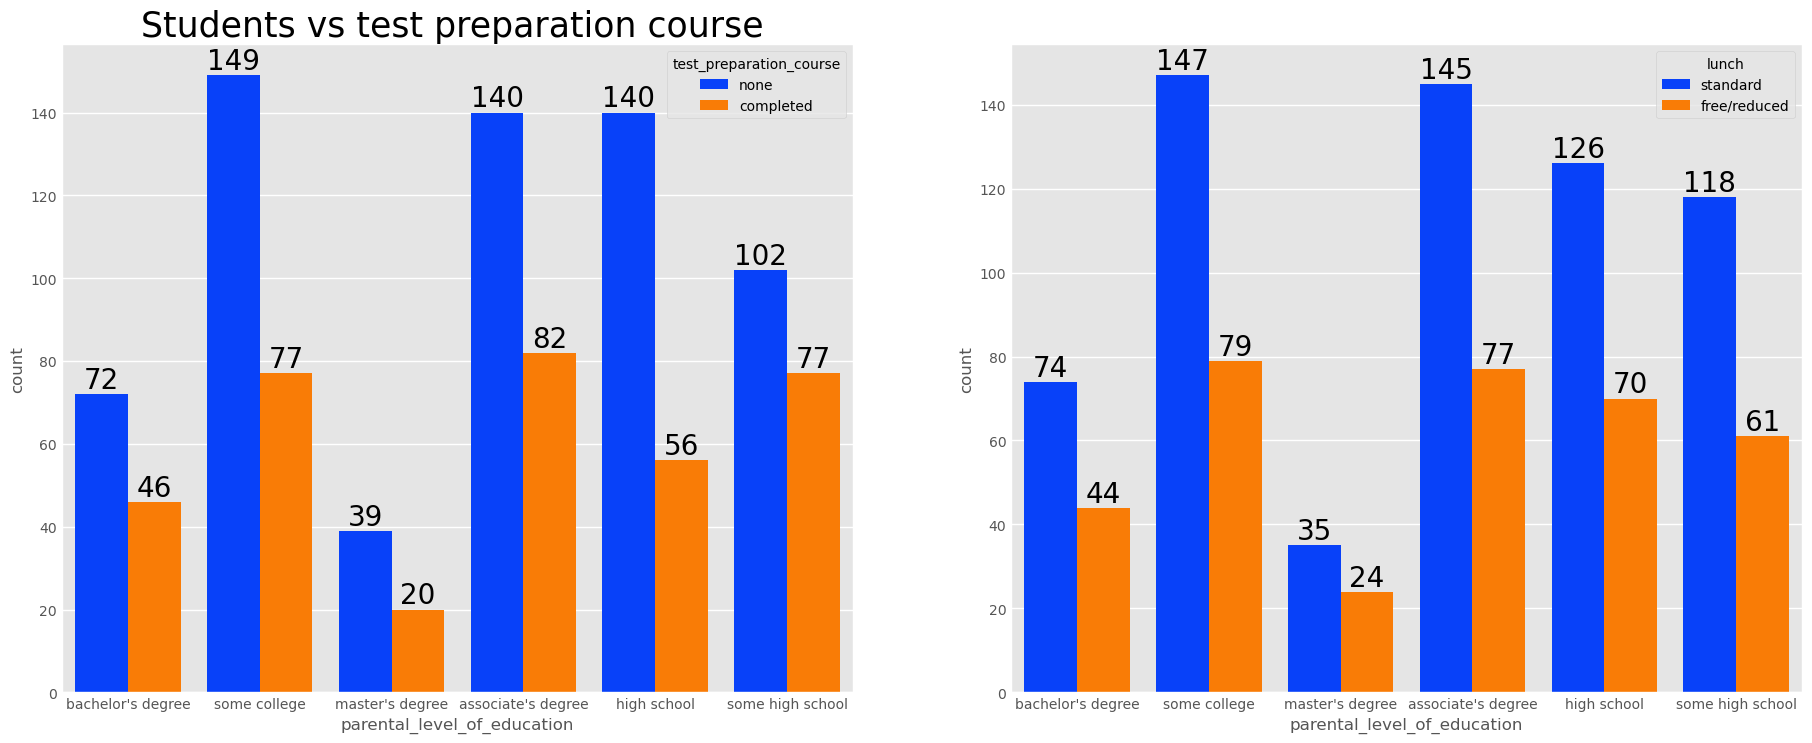

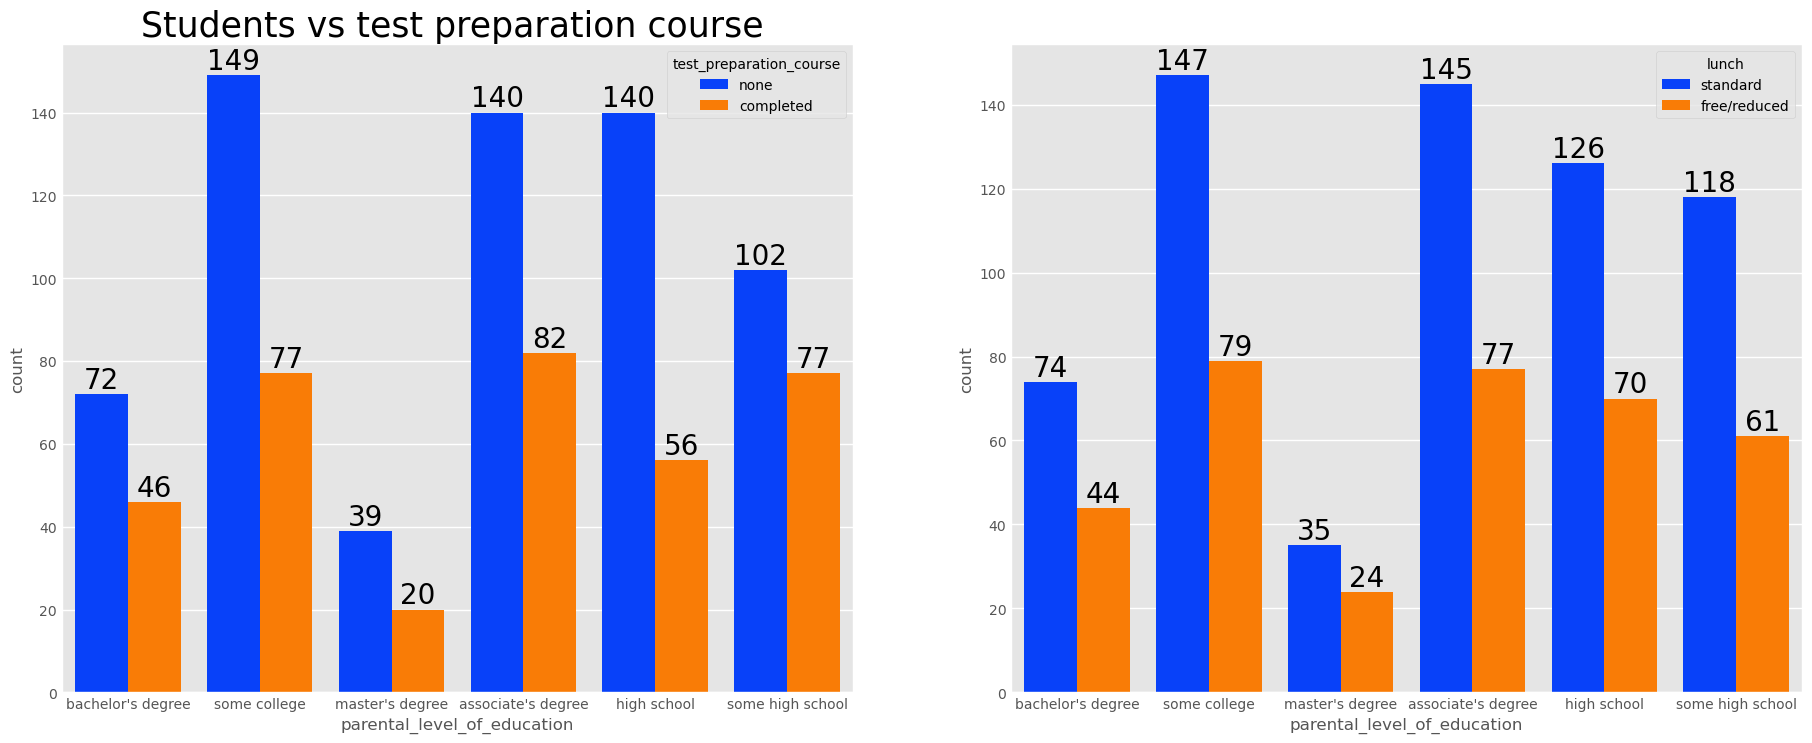

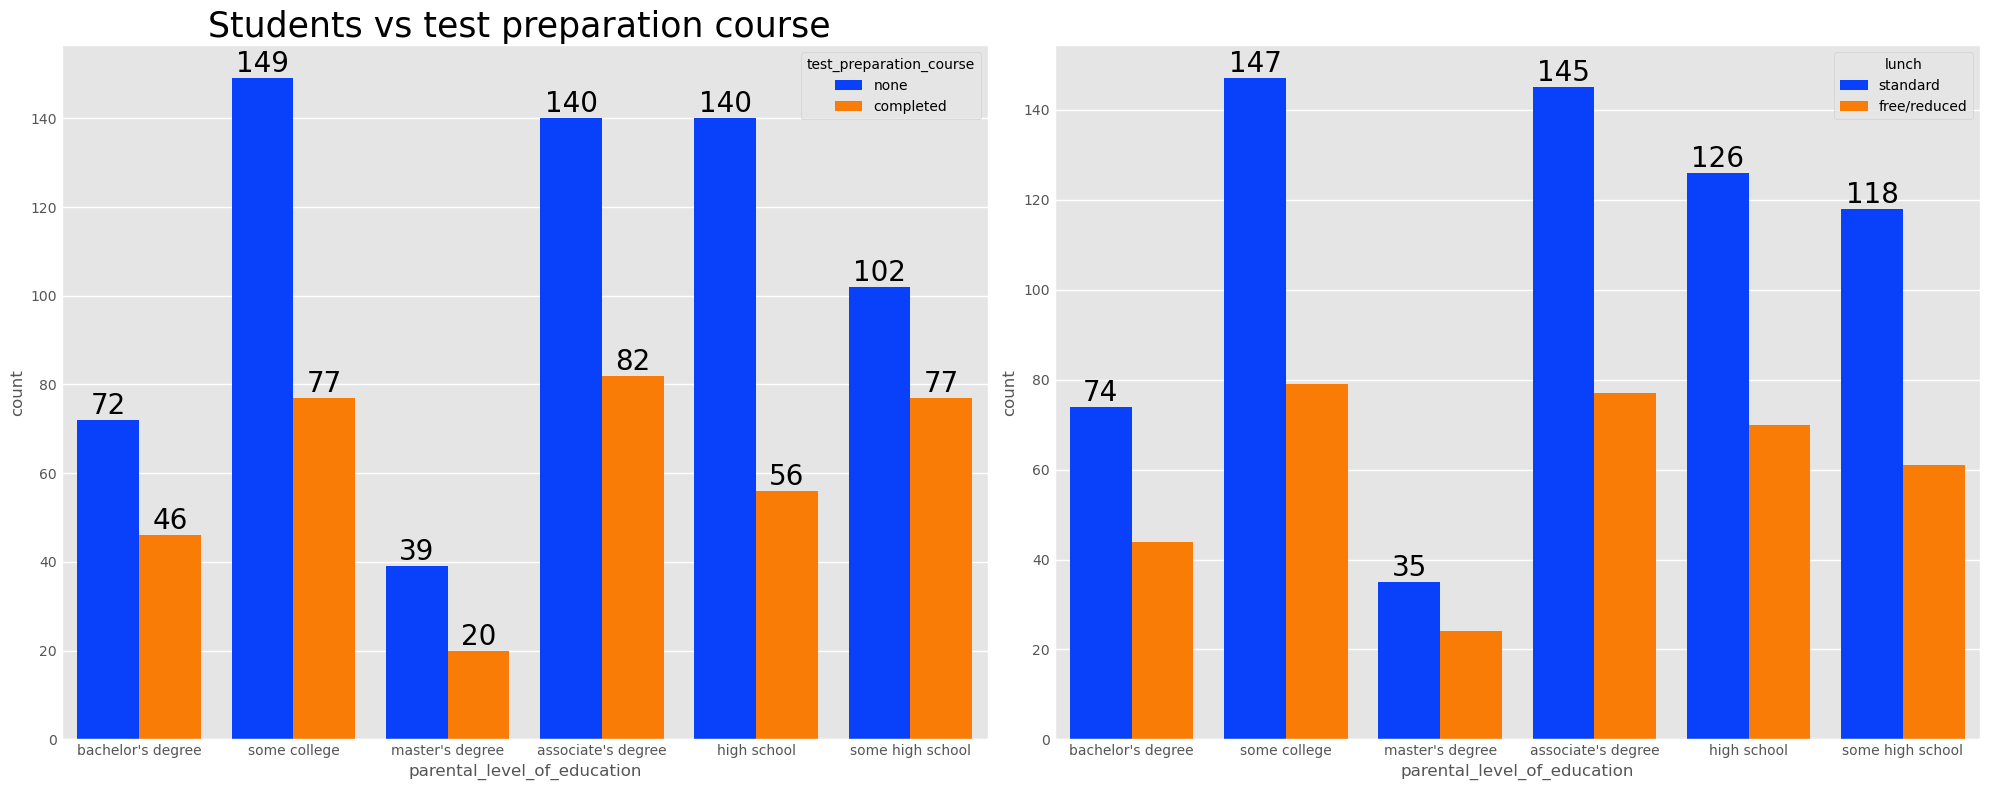

<Figure size 1500x900 with 0 Axes>

In [76]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)
    plt.tight_layout()
    plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?


#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

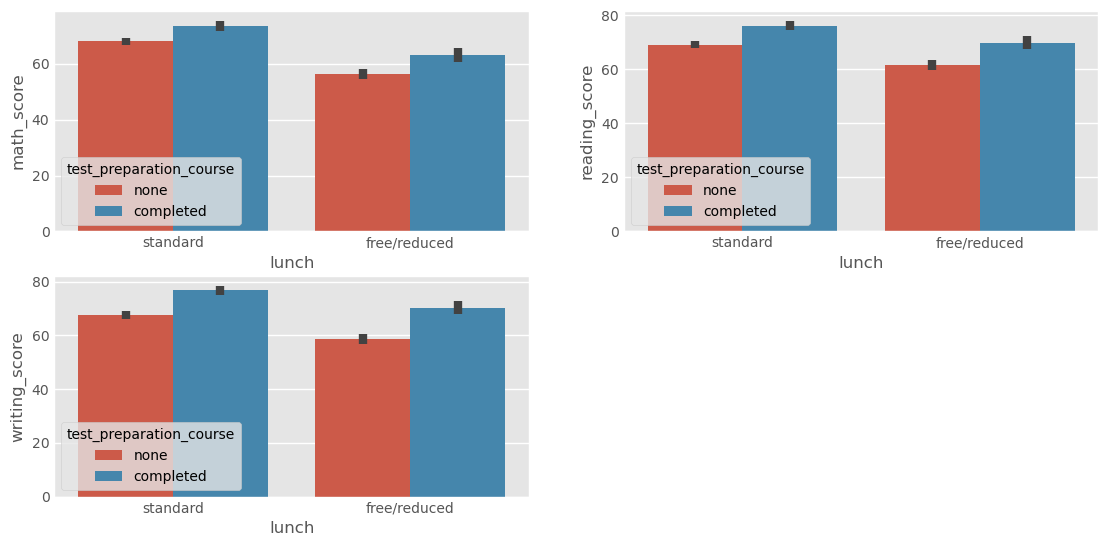

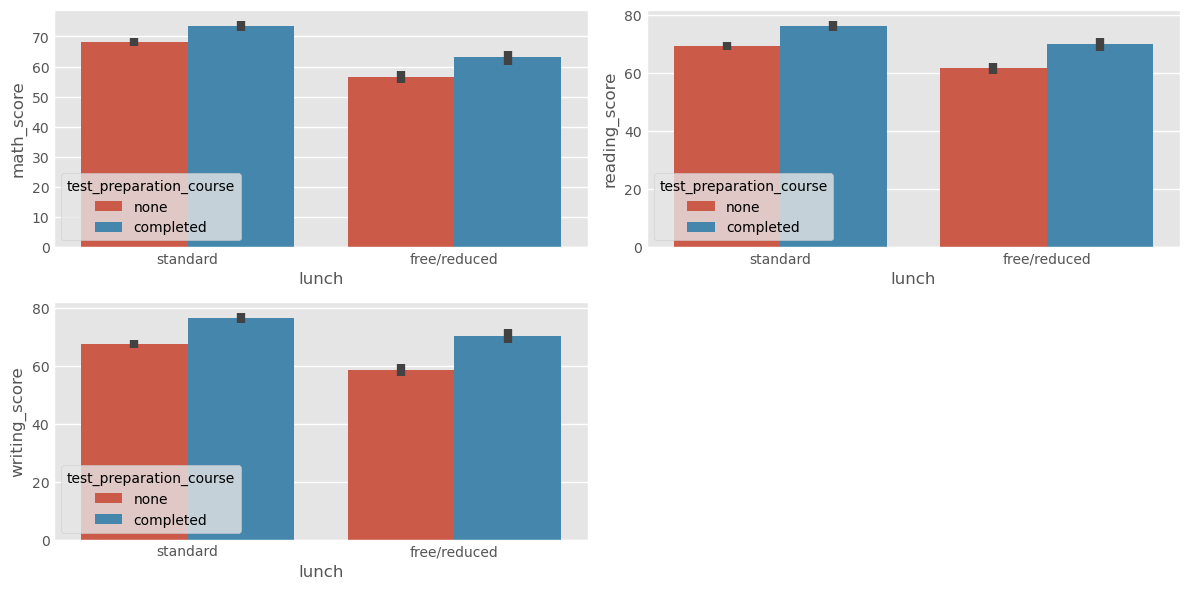

In [78]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.tight_layout()
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

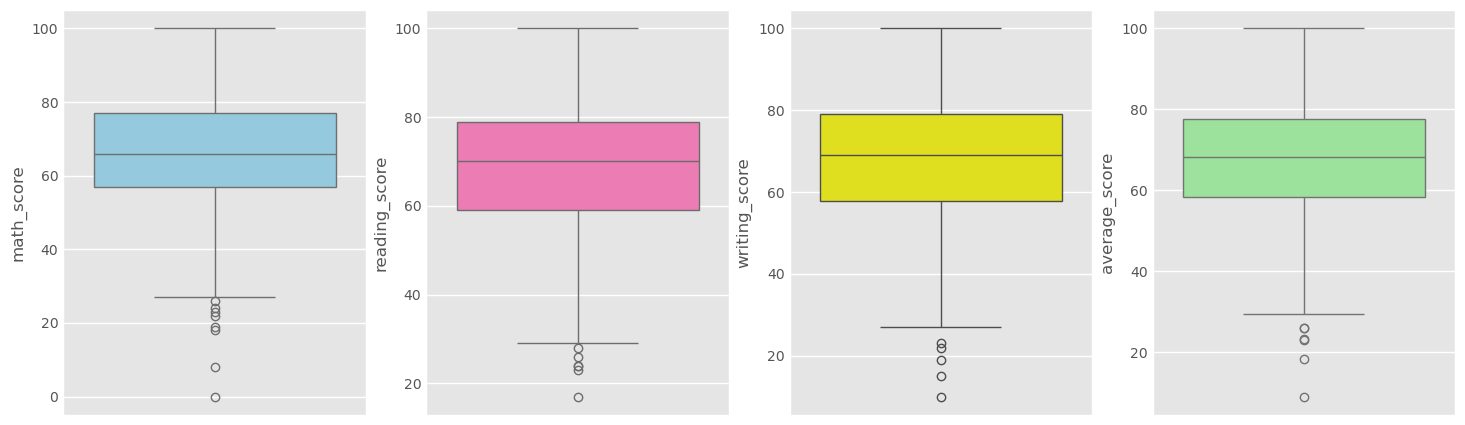

In [79]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

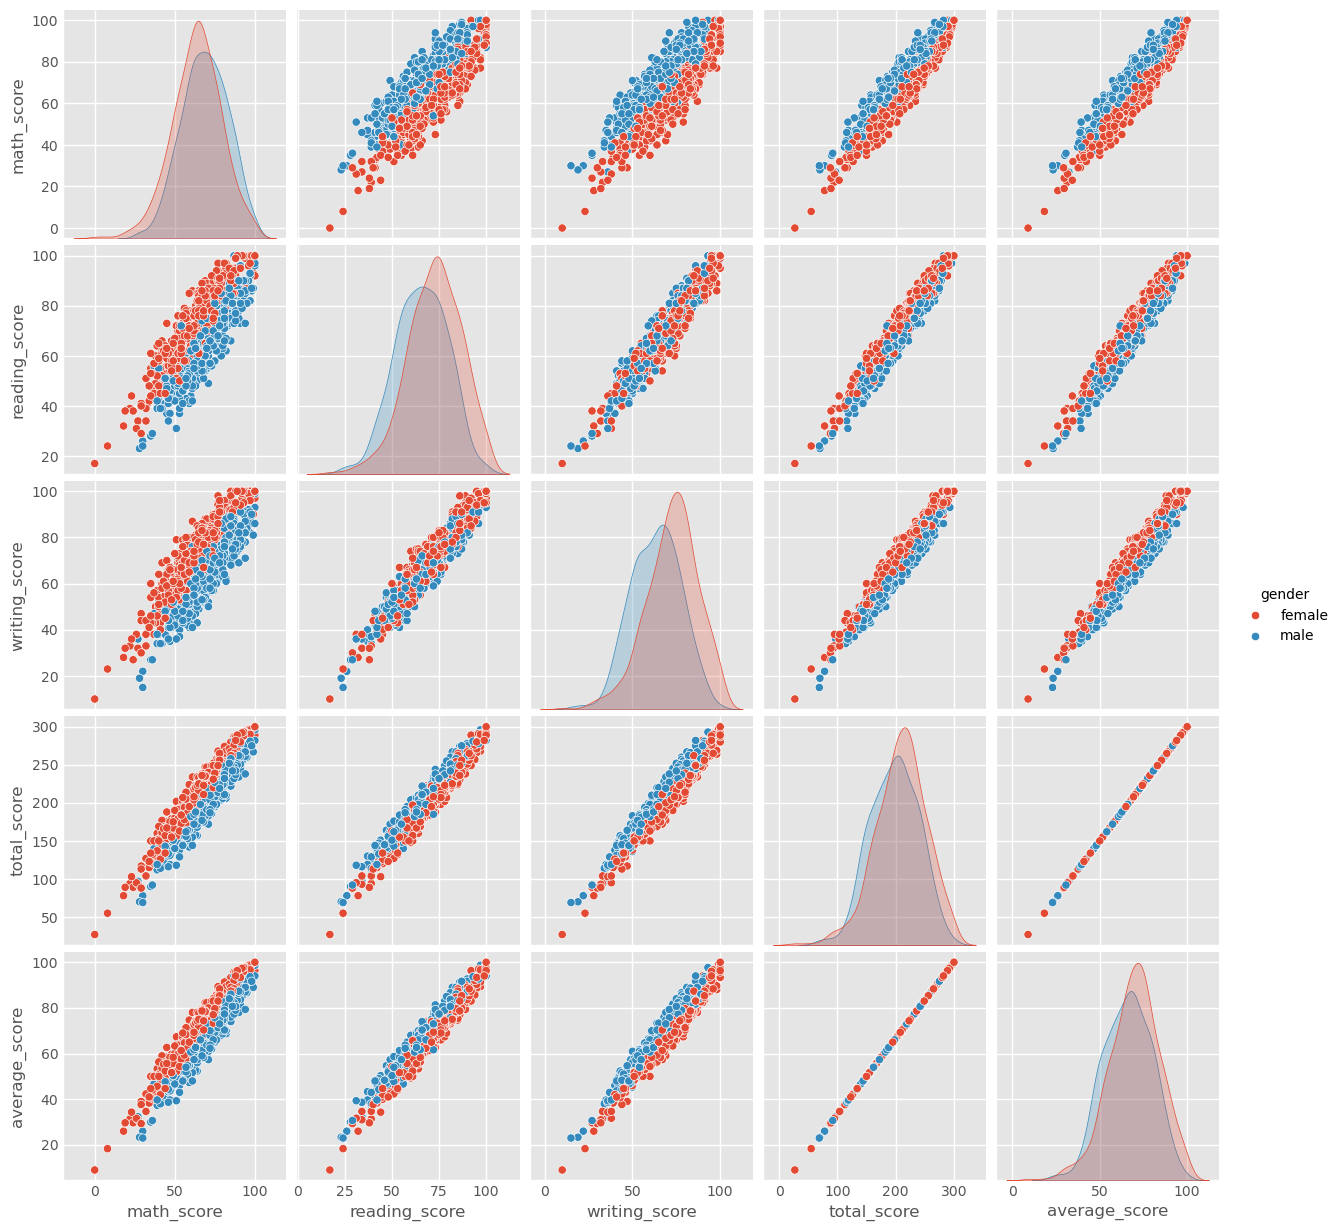

In [80]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.